In [1]:
# %load cappy_mura.py
import numpy as np
import matplotlib.pyplot as plt
import pyprimes
import random
from sympy import isprime  # pyprimes doesn't have isprime method, or does it?

class mask():
    
    def __init__(self):
        A_ij = None
    
    def show(self, inverse=False):
        if inverse:
            plt.imshow(self.A_ij, cmap="binary_r")
        else:
            plt.imshow(self.A_ij, cmap="binary")
        plt.axis('off')
        plt.show()

    def get_pattern(self, inverse=False):
        if inverse:
            return 1-self.A_ij
        else:
            return self.A_ij
			
class ura(mask):
    
    def __init__(self, rank=4, mult=2, quiet=False):
        self.rank = rank
        self.mult = mult
        
        # get r, s
        r, s = self.__get_prime_pairs(self.rank)
        self.r = r
        self.s = s
        
        # generate C_r(I)
        C_r_I = np.zeros(r) - 1
        C_s_J = np.zeros(s) - 1
        for x in range(1, r):
            C_r_I[x**2 % r] = 1
        for y in range(1, s):
            C_s_J[y**2 % s] = 1

        # generate A_IJ
        A_IJ = np.zeros([r,s])
        for I in range(r):
            for J in range(s):
                if I == 0:
                    A_IJ[I,J] = 0
                elif J == 0:
                    A_IJ[I,J] = 1
                elif C_r_I[I] * C_s_J[J] == 1:
                    A_IJ[I,J] = 1

        # generate A_ij
        m = self.mult
        A_ij = np.zeros([m*r,m*s])
        for i in range(m*r):
            for j in range(m*s):
                A_ij[i,j] = A_IJ[i%r,j%s]
        A_ij = np.roll(A_ij, int((r+1)/2), axis=0)
        A_ij = np.roll(A_ij, int((s+1)/2), axis=1)
        self.A_ij = A_ij
        
        if not quiet:
            self.info()
        
    def info(self):
        print("Uniformly Redundant Array")
        print("r, s: %i, %i (rank %i)" % (self.r, self.s, self.rank))
        print("multiplier: %i" % self.mult)
        
    def __get_prime_pairs(self, rank):
        pit = pyprimes.primes()

        # intialize
        p1 = next(pit)
        this_rank = -1

        # find primes
        while True:
            p2 = next(pit)
            if (p2-p1) == 2:
                this_rank += 1
            else:
                p1 = p2
            if this_rank == rank:
                break

        return p1, p2
		
class rand_array(mask):
    
    def __init__(self, r=10, s=10, fill=0.5, quiet=False):
        self.r = r
        self.s = s
        self.fill = fill
        
        # randomly fill
        A_ij = np.zeros([r, s])
        for i in range(r):
            for j in range(s):
                if random.random() < self.fill:
                    A_ij[i,j] = 1
        self.A_ij = A_ij
        self.actual_fill = np.sum(A_ij)/(self.r*self.s)
        
        if not quiet:
            self.info()
        
    def info(self):
        print("Random Array")
        print("r, s: %i, %i" % (self.r, self.s))
        print("desired fill factor: %.2f" % self.fill)
        print("actuall fill factor: %.2f" % self.actual_fill)
		
class mura(mask):
    
    def __init__(self, p, m, quiet=False):
        
        self.p = p
        self.m = m
        
        # generate C(I)
        C_I = np.zeros(p)-1
        C_J = np.zeros(p)-1
        for x in range(1, p):
            C_I[x**2 % p] = 1
        for y in range(1, p):
            C_J[y**2 % p] = 1
            
        # generate A_IJ
        A_IJ = np.zeros([p,p])
        for I in range(p):
            for J in range(p):
                if I == 0:
                    A_IJ[I,J] = 0
                elif J == 0:
                    A_IJ[I,J] = 1
                elif C_I[I] * C_J[J] == 1:
                    A_IJ[I,J] = 1

        # generate A_ij
        A_ij = np.zeros([m*p,m*p])
        for i in range(m*p):
            for j in range(m*p):
                A_ij[i,j] = A_IJ[i%p,j%p]
                
        A_ij = np.delete(A_ij,0,1)  # deletes first column
        A_ij = np.delete(A_ij,0,0)  # deletes first row
        
        self.A_ij = A_ij
        
        if not quiet:
            self.info()
            
    def info(self):
        print("Modified Uniformly Redundant Array")
        print("p: %i" % self.p)
        print("multiplier: %i" % self.m)
        
#  should find primes, not working yet
#     def __get_prime(self, rank):
#         m = 1
#         this_rank = -1
#         while True:
#             L = 4*m + 1
#             if sympy.isprime(L):
#                 this_rank += 1
#             if this_rank == rank:
#                 break
#             m += 1
#         return L

In [2]:
mura = mura(p=5, m=2)

Modified Uniformly Redundant Array
p: 5
multiplier: 2


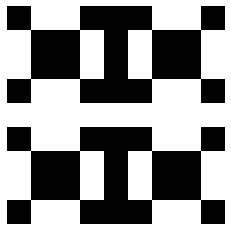

In [3]:
mura.show()

In [4]:
mura.get_pattern()

array([[1., 0., 0., 1., 1., 1., 0., 0., 1.],
       [0., 1., 1., 0., 1., 0., 1., 1., 0.],
       [0., 1., 1., 0., 1., 0., 1., 1., 0.],
       [1., 0., 0., 1., 1., 1., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 1., 1., 1., 0., 0., 1.],
       [0., 1., 1., 0., 1., 0., 1., 1., 0.],
       [0., 1., 1., 0., 1., 0., 1., 1., 0.],
       [1., 0., 0., 1., 1., 1., 0., 0., 1.]])